In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
train_df = pd.read_excel('train.xlsx')
test_df = pd.read_excel('test.xlsx')

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [89]:
#`train_df.info()` provides a concise summary of a DataFrame.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [90]:
# the dimensions of the DataFrame `train_df`. 
train_df.shape

(10683, 11)

In [91]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [92]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [93]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [94]:
train_df[train_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [95]:
test_df[test_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


#### Exploratory Data Analysis

##### Missing values

In [96]:
train_df.loc[train_df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### Insights
- There's only one missing value row , so we can either fill it with some statistical methods or drop that row.

In [97]:
# Dropping missing values because theres only 1 row that has missing values
train_df.dropna(axis=0,inplace=True)

In [98]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### We Need to convert some of the columns to numerical columns so that it can be useful

In [99]:
#### Converting 'Date_Of_journey' column to datetime column
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y")
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [100]:
train_df['Date_of_Journey'].dt.year.unique()
test_df['Date_of_Journey'].dt.year.unique()

array([2019])

In [101]:
# Making new columns 'Day and Month' because the year is same for every journey
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey']).dt.month
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey']).dt.day
test_df['Month'] = pd.to_datetime(test_df['Date_of_Journey']).dt.month
test_df['Day'] = pd.to_datetime(test_df['Date_of_Journey']).dt.day
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [102]:
train_df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)
test_df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [103]:
##### Mapping 'Total_Stops' column to numerical values
train_df['Total_Stops'] = train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test_df['Total_Stops'] = test_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1


In [104]:
# Converting 'Dep_time' and 'Arrival_time' columns to datetime format 
train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])
train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'])

train_df.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_24400\511350399.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])
C:\Users\singh\AppData\Local\Temp\ipykernel_24400\511350399.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
C:\Users\singh\AppData\Local\Temp\ipykernel_24400\511350399.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])
C:\Users\singh\AppData\Local\Temp\ipykernel_24400\51135039

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-21 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-21 05:50:00,2024-02-21 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-21 09:25:00,2024-06-10 04:25:00,19h,2,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-21 18:05:00,2024-02-21 23:30:00,5h 25m,1,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-21 16:50:00,2024-02-21 21:35:00,4h 45m,1,No info,13302,3,1


In [105]:
# Converting Hour and minutes of Departure and arrival time to seperate columns
train_df['Dep_time_Hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_time_minute'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df['Arrival_Time_Hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Time_minute'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute
test_df['Dep_time_Hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_time_minute'] = pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df['Arrival_Time_Hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Time_minute'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-21 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-21 05:50:00,2024-02-21 13:15:00,7h 25m,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-21 09:25:00,2024-06-10 04:25:00,19h,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-21 18:05:00,2024-02-21 23:30:00,5h 25m,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-21 16:50:00,2024-02-21 21:35:00,4h 45m,1,No info,13302,3,1,16,50,21,35


In [106]:
# Dropping the Dep_time and Arrival Time columns
train_df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)
test_df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,16,50,21,35


In [107]:
## Additional info column
train_df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [108]:
# Since huge number of rows have no info , we are gonna drop this column
train_df.drop(columns=['Additional_Info'],axis=1,inplace=True)
test_df.drop(columns=['Additional_Info'],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,3,1,16,50,21,35


In [109]:
# This function will convert the duration to minutes
def convert_duration(Duration):
        if len(Duration.split()) == 2:
            hours = int(Duration.split()[0][: -1])
            minutes = int(Duration.split()[1][: -1])
            return hours * 60 + minutes
        else:
            return int(Duration[: -1]) * 60

In [110]:
# Converting duration into minutes
train_df['Duration'] = train_df['Duration'].apply(convert_duration)
test_df['Duration'] = test_df['Duration'].apply(convert_duration)
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,3,1,16,50,21,35


In [111]:
train_df.drop(columns=['Route'],axis=1,inplace=True)
test_df.drop(columns=['Route'],axis=1,inplace=True)
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,170,0,6,24,23,55,2,45


In [112]:
# Checking unique values in cateogrical columns
print(f'Number of Unique Categories in Airline are : {train_df.Airline.value_counts().index}')
print(f'Number of Unique Categories in Source are : {train_df.Source.value_counts().index}')
print(f'Number of Unique Categories in Destination are : {train_df.Destination.value_counts().index}')


Number of Unique Categories in Airline are : Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')
Number of Unique Categories in Source are : Index(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype='object', name='Source')
Number of Unique Categories in Destination are : Index(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'], dtype='object', name='Destination')


In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Duration             10682 non-null  int64 
 4   Total_Stops          10682 non-null  int64 
 5   Price                10682 non-null  int64 
 6   Month                10682 non-null  int32 
 7   Day                  10682 non-null  int32 
 8   Dep_time_Hour        10682 non-null  int32 
 9   Dep_time_minute      10682 non-null  int32 
 10  Arrival_Time_Hour    10682 non-null  int32 
 11  Arrival_Time_minute  10682 non-null  int32 
dtypes: int32(6), int64(3), object(3)
memory usage: 834.5+ KB


In [114]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()
cat_columns = [col for col in train_df.columns if train_df[col].dtype == 'O']
for col in cat_columns:
    train_dummies = pd.get_dummies(train_df[col],drop_first=True)
    print(col)
    dummies = pd.get_dummies(test_df[col],drop_first=True)
    train_df.drop(col,axis=1,inplace=True)
    test_df.drop(col,axis=1,inplace=True)
    train_df = pd.concat([train_df,train_dummies],axis=1)
    test_df = pd.concat([test_df,dummies],axis=1)

train_df.head()

Airline
Source
Destination


,Duration,Total_Stops,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,3897,3,24,22,20,1,10,False,...,False,False,False,False,False,False,False,False,False,True
1,445,2,7662,5,1,5,50,13,15,True,...,False,False,False,True,False,False,False,False,False,False
2,1140,2,13882,6,9,9,25,4,25,False,...,False,False,True,False,False,True,False,False,False,False
3,325,1,6218,5,12,18,5,23,30,False,...,False,False,False,True,False,False,False,False,False,False
4,285,1,13302,3,1,16,50,21,35,False,...,False,False,False,False,False,False,False,False,False,True


#### Data Visualization

In [76]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Duration                           10682 non-null  int64
 1   Total_Stops                        10682 non-null  int64
 2   Price                              10682 non-null  int64
 3   Month                              10682 non-null  int32
 4   Day                                10682 non-null  int32
 5   Dep_time_Hour                      10682 non-null  int32
 6   Dep_time_minute                    10682 non-null  int32
 7   Arrival_Time_Hour                  10682 non-null  int32
 8   Arrival_Time_minute                10682 non-null  int32
 9   Air India                          10682 non-null  bool 
 10  GoAir                              10682 non-null  bool 
 11  IndiGo                             10682 non-null  bool 
 12  Jet Airways            

In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Duration                           2671 non-null   int64
 1   Total_Stops                        2671 non-null   int64
 2   Month                              2671 non-null   int32
 3   Day                                2671 non-null   int32
 4   Dep_time_Hour                      2671 non-null   int32
 5   Dep_time_minute                    2671 non-null   int32
 6   Arrival_Time_Hour                  2671 non-null   int32
 7   Arrival_Time_minute                2671 non-null   int32
 8   Air India                          2671 non-null   bool 
 9   GoAir                              2671 non-null   bool 
 10  IndiGo                             2671 non-null   bool 
 11  Jet Airways                        2671 non-null   bool 
 12  Jet Airways Business

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = RandomForestRegressor()
y = train_df['Price']
X = train_df.drop(columns=['Price','Trujet'],axis=1)
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model.fit(X_train,y_train)
preds = model.predict(X_test)
score = model.score(X_train,y_train)
result = mean_absolute_error(preds,y_test)
r2_square = r2_score(preds,y_test)
print(score,result,r2_square)


Index(['Duration', 'Total_Stops', 'Month', 'Day', 'Dep_time_Hour',
       'Dep_time_minute', 'Arrival_Time_Hour', 'Arrival_Time_minute',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')


0.9528408137694911 1161.083518414643 0.7863000676118743


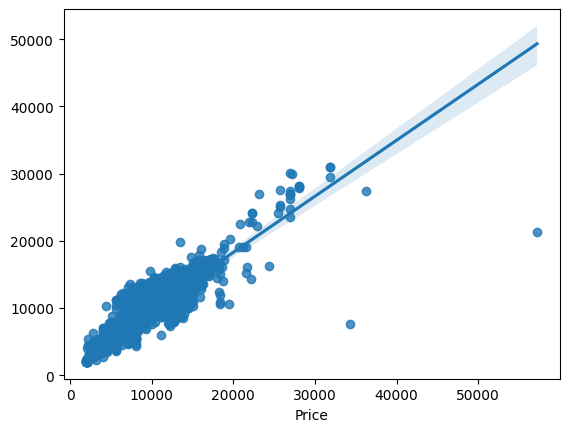

In [79]:
sns.regplot(x=y_test,y=preds)
plt.show()

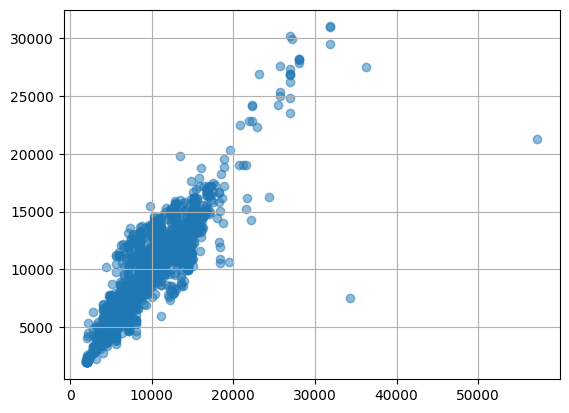

In [80]:
plt.scatter(y_test,preds,alpha=0.5)
plt.grid()
plt.show()

c:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


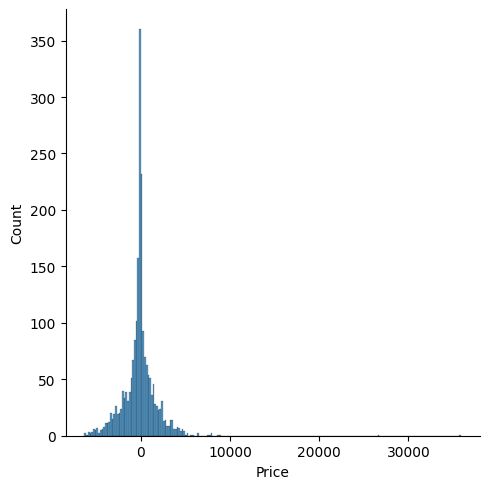

In [81]:
sns.displot(y_test-preds)
plt.show()


In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [84]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [85]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1,error_score='raise')

In [39]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [41]:
prediction = rf_random.predict(X_test)
resultss = r2_score(y_test,prediction)
print(resultss)

0.8242819138593217


In [42]:
import pickle

file = open('flight.pkl','wb')

pickle.dump(model,file)

In [43]:
model_obj = open('flight.pkl','rb')
forest = pickle.load(model_obj)

In [44]:
y_predictions = forest.predict(X_test)
score = r2_score(y_test,y_predictions)
score

0.8248214338718136

In [45]:
X_train.columns

Index(['Duration', 'Total_Stops', 'Month', 'Day', 'Dep_time_Hour',
       'Dep_time_minute', 'Arrival_Time_Hour', 'Arrival_Time_minute',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

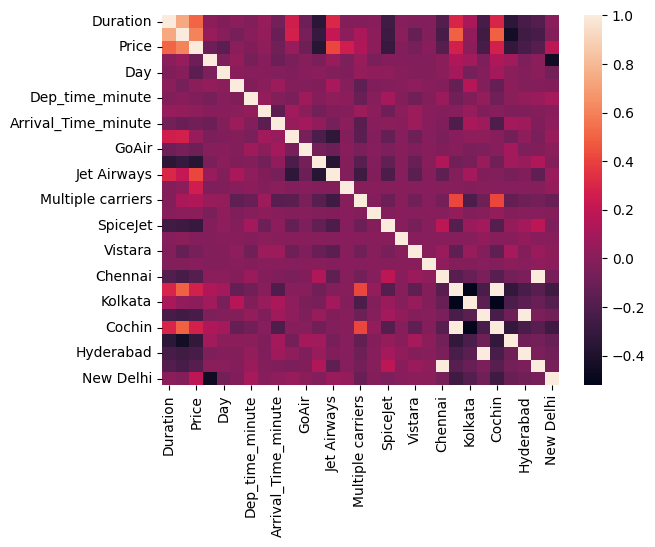

In [46]:
sns.heatmap(train_df.corr())
plt.show()

In [47]:
train_df.corr()

,Duration,Total_Stops,Price,Month,Day,Dep_time_Hour,Dep_time_minute,Arrival_Time_Hour,Arrival_Time_minute,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Duration,1.000000,0.738204,0.506604,0.014757,-0.022488,0.002122,-0.019025,0.051555,-0.069567,0.261689,...,-0.016165,-0.190671,0.295745,0.124410,-0.234616,0.295745,-0.340220,-0.234616,-0.190671,0.006715
Total_Stops,0.738204,1.000000,0.603897,0.054383,-0.009451,-0.061476,-0.002618,0.038140,-0.106940,0.271094,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.506604,0.603897,1.000000,-0.103643,-0.153774,0.006799,-0.024458,0.024244,-0.086155,0.050432,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Month,0.014757,0.054383,-0.103643,1.000000,-0.038359,0.039127,-0.059267,-0.003927,-0.100626,-0.045981,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Day,-0.022488,-0.009451,-0.153774,-0.038359,1.000000,0.002170,-0.008170,-0.003245,-0.017510,-0.032490,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Dep_time_Hour,0.002122,-0.061476,0.006799,0.039127,0.002170,1.000000,-0.024745,0.005180,0.067911,-0.012879,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_time_minute,-0.019025,-0.002618,-0.024458,-0.059267,-0.008170,-0.024745,1.000000,0.043122,-0.017597,-0.045688,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_Time_Hour,0.051555,0.038140,0.024244,-0.003927,-0.003245,0.005180,0.043122,1.000000,-0.154363,0.088872,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_Time_minute,-0.069567,-0.106940,-0.086155,-0.100626,-0.017510,0.067911,-0.017597,-0.154363,1.000000,0.061231,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Air India,0.261689,0.271094,0.050432,-0.045981,-0.032490,-0.012879,-0.045688,0.088872,0.061231,1.000000,...,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072
